[INDICIUM] Ciências de Dados

Desafio de Data Science do processo seletivo 2024 para programa de formação da ligth house.

Inscrito: Ian Lucas Périgo Vianna
Linkedin:
Github:
WhatsApp:

**Desafio**

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema. O uso de outras fontes de dados além do dataset é permitido (e encorajado). Você poderá encontrar em anexo um dicionário dos dados.

# Entregas

    - Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!
    - Responda também às seguintes perguntas:
        a. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
        b. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
        c. Existe algum padrão no texto do nome do local para lugares de mais alto valor?
    - Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?
    - Supondo um apartamento com as seguintes características:

{'id': 2595,

 'nome': 'Skylit Midtown Castle',

 'host_id': 2845,

 'host_name': 'Jennifer',

 'bairro_group': 'Manhattan',

 'bairro': 'Midtown',

 'latitude': 40.75362,

 'longitude': -73.98377,

 'room_type': 'Entire home/apt',

 'price': 225,

 'minimo_noites': 1,

 'numero_de_reviews': 45,

 'ultima_review': '2019-05-21',

 'reviews_por_mes': 0.38,

 'calculado_host_listings_count': 2,
 
 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?

    

# Instruções de Entrega:
- Você tem até 7 dias corridos para a entrega, contados a partir do recebimento deste desafio.
- Envie o seu relatório dentro da sua data limite para o email: selecao.lighthouse@indicium.tech
- O arquivo de entrega deve ser nomeado como: LH_CD_SEUNOME
- Salve o modelo desenvolvido no formato .pkl. 
- A entrega deve ser feita através de um repositório de código público que contenha:
    - README explicando como instalar e executar o projeto
    - Arquivo de requisitos com todos os pacotes utilizados e suas versões
    - Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
    - Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
    - Arquivo .pkl conforme passo 5 acima.
- Todos os códigos produzidos devem seguir as boas práticas de codificação.

# Dicionário dos dados
## A base de dados de treinamento contém 16 colunas. Seus nomes são auto-explicativos, mas, caso haja alguma dúvida, a descrição das colunas é:

- id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
- nome - Representa o nome do anúncio
- host_id - Representa o id do usuário que hospedou o anúncio
- host_name – Contém o nome do usuário que hospedou o anúncio
- bairro_group - Contém o nome do bairro onde o anúncio está localizado
- bairro - Contém o nome da área onde o anúncio está localizado
- latitude - Contém a latitude do local
- longitude - Contém a longitude do local
- room_type – Contém o tipo de espaço de cada anúncio
- price - Contém o preço por noite em dólares listado pelo anfitrião
- minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
- numero_de_reviews - Contém o número de comentários dados a cada listagem
- ultima_review - Contém a data da última revisão dada à listagem
- reviews_por_mes - Contém o número de avaliações fornecidas por mês
- calculado_host_listings_count - Contém a quantidade de listagem por host
- disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

# Etapas:

## - [X] Visualizar os dados
## - [X]Manipular e preparar os dados
## - [ ]Análise exploratória (EDA)
## - [ ]Decidir modelos de machine learning
## - [ ]Testes, Resultados e Hipóteses
## - [ ]Entregar demandas do desafio

In [1]:
# Dependências
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import missingno as msno
import matplotlib.pyplot as plt
#from difflib import get_close_matches

C:\Users\ianpv\AppData\Local\Temp\ipykernel_20744\2724603698.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Visualizar Dados
- Análise geral das features
- Distingguir formato das features (int, float, char)
- Identificar anomalias, dados ausentes e erros

In [2]:
host = pd.read_csv('C:/Users/ianpv/OneDrive/Light_house/teste_indicium_precificacao.csv')
host.describe()


,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Análise Geral
- Notamos que algumas features apresentam valores máximos e mínimos que podem indicar anomalias, examinaremos e possivelmente trataremos esses outliers.
- As features de latitude e longitude São complexas de tirar relações diretas, talvez uma abordagem utilizando distância euclidiana possa ser útil para cálculos de proximidade espacial.
- Price apresenta valores mínimos igual a zero o que pode indicar um erro visto que cada imóvel que será alugado tende a ter um preço.
- A Feature calculado_host_listings_count apresenta uma distribuição normal observável pelos valores (min,25%,50%,75%) próximos.


In [3]:
# Análise Geral
host.info()

print('\n')
# Segregação de Dados por Tipo de Dados
colunas_por_dtype = host.columns.to_series().groupby(host.dtypes).groups

for dtype, colunas in colunas_por_dtype.items():
    print(f"Tipo de Dados: {dtype}")
    print(", ".join(colunas))
    print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [4]:
# Dividir os dados em categóricos e numéricos

categoricos = host.select_dtypes(include='object')
numericos = host.select_dtypes(exclude='object')


In [5]:
categoricos.sample(20)

,nome,host_name,bairro_group,bairro,room_type,ultima_review
44310,Gorgeous Tribeca 2BR w/ Amazing city views + G...,Blueground,Manhattan,Tribeca,Entire home/apt,NaN
32075,NEAR COLUMBIA PRESBYTERIAN HOSP- Students*Visi...,Juliana,Manhattan,Washington Heights,Private room,2019-02-06
17096,Large 1BR in the Heart of Hell's Kitchen!!,Will,Manhattan,Hell's Kitchen,Entire home/apt,NaN
45977,Cozy Room in Charming Sunny Loft,Jen,Brooklyn,Williamsburg,Private room,NaN
15059,High-end bright 1 bedroom apt. in Midtown West,Kara,Manhattan,Midtown,Entire home/apt,NaN
33275,“Comfort Inn” Queens. NON-SMOKERS ONLY.,Joy,Queens,Rego Park,Shared room,2019-06-30
14592,Sunny & Spacious 1br Lower East Side Apartment,Peter,Manhattan,Chinatown,Entire home/apt,2019-07-06
31002,Harlem suit La barrio,Najah,Manhattan,East Harlem,Entire home/apt,2018-11-01
33255,"Cozy studio, Best Location /Live like a New Yo...",Alberto,Manhattan,Midtown,Entire home/apt,2018-12-14
35587,Artsy Brooklyn Apartment,Heather Marie,Brooklyn,Flatbush,Private room,2018-12-02


### Análise de dados Categoricos
- Pela amostra de 20 Observamos uma DataSet organizado
- A feature da data da última review tem alguns valores ausentes também pode ser convertida para o tipo datetime com o pandas para podermos gerar insights se imóveis com a data da última review mais atualizada implica em aumento de preço do aluguel ou outra correlação.
- Vamos confirmar se as features categóricas não possuem valores duplicados e com erros de digitação que possam atrapalhar nossa análise

In [6]:
contagem_categoricos = categoricos.nunique()
print(contagem_categoricos)

nome             47904
host_name        11452
bairro_group         5
bairro             221
room_type            3
ultima_review     1764
dtype: int64


In [8]:
# Obter os valores únicos da feature 'categoria'
valores_unicos = categoricos['room_type'].unique()

# Imprimir os valores únicos
print("Valores únicos da feature 'room_type':")
print(valores_unicos)

Valores únicos da feature 'room_type':
['Entire home/apt' 'Private room' 'Shared room']


In [9]:
# Obter os valores únicos da feature 'categoria'
valores_unicos = categoricos['bairro_group'].unique()

# Imprimir os valores únicos
print("Valores únicos da feature 'bairro_group':")
print(valores_unicos)

Valores únicos da feature 'bairro_group':
['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']


In [10]:
# Obter os valores únicos da feature 'categoria'
valores_unicos = categoricos['bairro'].unique()

# Imprimir os valores únicos
print("Valores únicos da feature 'bairro':")
print(valores_unicos)

Valores únicos da feature 'bairro':
['Midtown' 'Harlem' 'Clinton Hill' 'East Harlem' 'Murray Hill'
 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side' 'Chinatown'
 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene' 'Chelsea'
 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood' 'East Village'
 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Kensington' 'Clason Point' 'Eastchester'
 'Kingsbridge' 'Two Bridges' 'Queens Village' 'Rockaway Beach'
 'Forest Hills' 'Nolit

Agora iremos explorar um pouco mais o dataframe com dados categoricos, devemos analisar a possibilidade de codificação dos dados. Fazendo um describe podemos analisar quais features apresentam poucos valores únicos tornando-os mais propensos a codificação.

In [54]:
categoricos_input.describe()

,nome,host_name,bairro_group,bairro,room_type,ultima_review
count,48878,48873,48894,48894,48894,48894
unique,47904,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,11465


Notamos que bairro_group e room_type são candidatos a codificação. Como o tipo de codificação é dependentes da escolha do tipo de machine learning aplicaremos a codificação posteriormente.

A feature bairro possue uma grande quantidade de valores únicos, aparentemente não possue valores com erros de escrita ou distinção de lower ou upper case. Porém por se tratar de uma grande quantidade de valores para olhar manualmente aplicamos a função get_closes_matches do múdulo difflib. Foi recontado e não houve alterações na contagem indicando que os valores da feature bairro estão organizados.
Abaixo o código utilizado para possível uso posterior:
- Função para encontrar correspondências próximas

def encontrar_correspondencia(valor, lista):

    matches = get_close_matches(valor, lista)
    
    return matches[0] if matches else valor

 - Aplicar a função para encontrar correspondências próximas

valores_corrigidos = categoricos['bairro'].apply(lambda x: encontrar_correspondencia(x, categoricos['bairro'].unique()))

 - Imprimir os valores corrigidos

print("Valores corrigidos:")

print(valores_corrigidos.unique())


### Vamos visualizar as features não categóricas

In [11]:
numericos.head(20)

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
1,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
2,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
3,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
4,5099,7322,40.74767,-73.97500,200,3,74,0.59,1,129
5,5121,7356,40.68688,-73.95596,60,45,49,0.40,1,0
6,5178,8967,40.76489,-73.98493,79,2,430,3.47,1,220
7,5203,7490,40.80178,-73.96723,79,2,118,0.99,1,0
8,5238,7549,40.71344,-73.99037,150,1,160,1.33,4,188
9,5295,7702,40.80316,-73.96545,135,5,53,0.43,1,6


In [12]:
# Verificar valores nulos nos dados categoricos
print('Valores nulos dos dados categoricos em porcentagem')
print(categoricos.isnull().mean() * 100)

Valores nulos dos dados categoricos em porcentagem
nome              0.032724
host_name         0.042950
bairro_group      0.000000
bairro            0.000000
room_type         0.000000
ultima_review    20.558760
dtype: float64


Por se tratar de um feature de avaliação do imóvel que pode ter algum tipo de influência sobre preço ou outras variáveis importantes. Iremos posteriormente analisar as formas de inputação mais adequadas e na parte de manipulação de dados inputar.

In [13]:
print('Valores nulos dos dados numéricos em porcentagem')
print(numericos.isnull().mean() * 100)

Valores nulos dos dados numéricos em porcentagem
id                                0.00000
host_id                           0.00000
latitude                          0.00000
longitude                         0.00000
price                             0.00000
minimo_noites                     0.00000
numero_de_reviews                 0.00000
reviews_por_mes                  20.55876
calculado_host_listings_count     0.00000
disponibilidade_365               0.00000
dtype: float64


<Axes: >

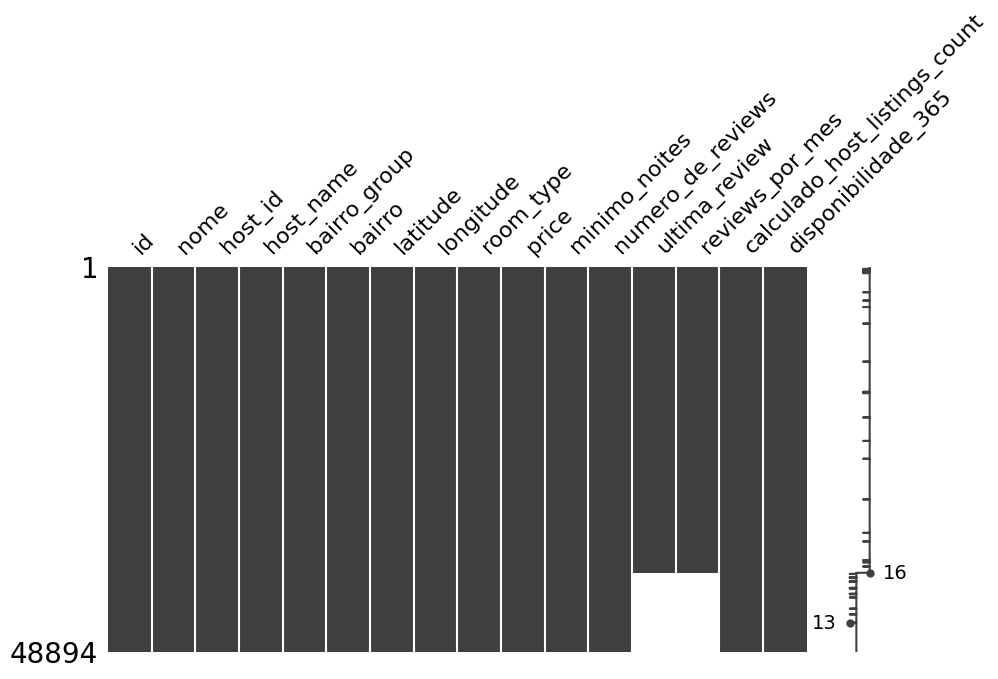

In [14]:
# Plotando o gráfico de missing values do dataset original
matrix = host.sort_values('reviews_por_mes')
msno.matrix(matrix, figsize=(10, 5))

Observado uma correlação direta de valores nulos de reviews_por_mes e ultima_reviews.

In [15]:
# Calculando a quantidade de valores iguais a zero na disponibilidade_365

dispobibilidade_zeros = (numericos['disponibilidade_365'] == 0).sum()
print('Número de valores 0 em disponibilidade_365: {}'.format(dispobibilidade_zeros))
# calculando a porcentagem de valores iguais a zero na disponibilidade_365
disponibility_zero_percent = (dispobibilidade_zeros / numericos.shape[0]) * 100
print('Porcentagem de valores 0 em disponibilidade_365: {:.2f}%'.format(disponibility_zero_percent))
print('\n')
price_zero = (numericos['price'] == 0).sum()
price_zero_percent = (price_zero / numericos.shape[0])*100
print('Número de valores 0 em preço: {}'.format(price_zero))
print ('Porcentagem de valores 0 em price: {:.2f}%'.format(price_zero_percent))

Número de valores 0 em disponibilidade_365: 17533
Porcentagem de valores 0 em disponibilidade_365: 35.86%


Número de valores 0 em preço: 11
Porcentagem de valores 0 em price: 0.02%


A quantidade de valores 0 na disponibilidade é muito elevada, por se tratar de uma feature relacionada com a entrega "B" do desafio devemos posteriormente tratá-las. O uso da média é o mais indicado para não alterar a distribuição estatística.

In [16]:
# Vamos calcular a média, mediana e moda de ultima_review, reviews_por_mes, numero_de_reviews e Disponibilidade_365

#Categórico
mode_ultima_review = categoricos['ultima_review'].mode()
print('Moda de ultima_review: {}'.format(mode_ultima_review[0]))
print('\n')

# Não Categórico
mean_last_review = numericos['reviews_por_mes'].mean()
median_ultima_review = numericos['reviews_por_mes'].median()
mode_ultima_review = numericos['reviews_por_mes'].mode()
print('Média de reviews_por_mes: {:.2f}'.format(mean_last_review))
print('Mediana de reviews_por_mes: {:.2f}'.format(median_ultima_review))
print('Moda de reviews_por_mes: {:.2f}'.format(mode_ultima_review[0]))
print('\n')
mean_numero_de_reviews = numericos['numero_de_reviews'].mean()
median_numero_de_reviews = numericos['numero_de_reviews'].median()
mode_numero_de_reviews = numericos['numero_de_reviews'].mode()
print('Média de numero_de_reviews: {:.2f}'.format(mean_numero_de_reviews))
print('Mediana de numero_de_reviews: {:.2f}'.format(median_numero_de_reviews))
print('Moda de numero_de_reviews: {:.2f}'.format(mode_numero_de_reviews[0]))

mean_disponibilidade_365 = numericos['disponibilidade_365'].mean()
median_disponibilidade_365 = numericos['disponibilidade_365'].median()
mode_disponibilidade_365 = numericos['disponibilidade_365'].mode()
print('\n')
print('Média de disponibilidade_dias_365: {:.2f}'.format(mean_disponibilidade_365))
print('Mediana de disponibilidade_dias_365: {:.2f}'.format(median_disponibilidade_365))
print('Moda de disponibilidade_dias_365: {:.2f}'.format(mode_disponibilidade_365[0]))

# Vamos calcular a média, mediana e moda de preço
mean_price = numericos['price'].mean()
median_price = numericos['price'].median()
mode_price = numericos['price'].mode()
print('\n')
print('Média de preço: {:.2f}'.format(mean_price))
print('Mediana de preço: {:.2f}'.format(median_price))
print('Moda de preço: {:.2f}'.format(mode_price[0]))

# Vamos calcular a média , mediana e moda de reviews_por_mes
mean_reviews_por_mes = numericos['reviews_por_mes'].mean()
median_reviews_por_mes = numericos['reviews_por_mes'].median()
mode_reviews_por_mes = numericos['reviews_por_mes'].mode()
print('\n')
print('Média de reviews_por_mes: {:.2f}'.format(mean_reviews_por_mes))
print('Mediana de reviews_por_mes: {:.2f}'.format(median_reviews_por_mes))
print('Moda de reviews_por_mes: {:.2f}'.format(mode_reviews_por_mes[0]))





Moda de ultima_review: 2019-06-23


Média de reviews_por_mes: 1.37
Mediana de reviews_por_mes: 0.72
Moda de reviews_por_mes: 0.02


Média de numero_de_reviews: 23.27
Mediana de numero_de_reviews: 5.00
Moda de numero_de_reviews: 0.00


Média de disponibilidade_dias_365: 112.78
Mediana de disponibilidade_dias_365: 45.00
Moda de disponibilidade_dias_365: 0.00


Média de preço: 152.72
Mediana de preço: 106.00
Moda de preço: 100.00


Média de reviews_por_mes: 1.37
Mediana de reviews_por_mes: 0.72
Moda de reviews_por_mes: 0.02


# Manipulando e Preparando os dados
- Imputando valores ausentes e nulos
    - Features categóricas
    - Features não categóricas
- Diagnosticar e tratar Outliers
- Transformação de dados
- Tidy Data

### Vamos fazer imputação simples de dados categoricos de ultima_review com a moda
### Vamos fazer imputação simples de dados numéricos:
- Número de reviews e reviews por mês
    - pela média
- disponibilidade_365
    - pela médiana
### Outros métodos testados que não gerou um bom resultado:
- Multiple Imputation by Chained Equations (MICE) com InterativeImputer (regressão múltipla)



In [17]:
# Inputar valores nulos da feature ultima_review que é categórica com a moda

#Cópia profunda dos dados categóricos
categoricos_input = categoricos.copy(deep=True)

modal_ultima_review = categoricos_input['ultima_review'].mode()[0]
categoricos_input['ultima_review']= categoricos_input['ultima_review'].fillna(modal_ultima_review)

# Verificar se os valores nulos foram inputados
print(categoricos_input.isnull().sum())

nome             16
host_name        21
bairro_group      0
bairro            0
room_type         0
ultima_review     0
dtype: int64


In [18]:
categoricos_input.head()

,nome,host_name,bairro_group,bairro,room_type,ultima_review
0,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
1,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,2019-06-23
2,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
3,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19
4,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,Entire home/apt,2019-06-22


In [19]:
# Inputar valores nulos da feature numero_de_review e reviews_por_mes que é numérica com a média

numericos_views_input = numericos.copy()


numericos_views_input['numero_de_reviews']= numericos_views_input['numero_de_reviews'].fillna(mean_numero_de_reviews)
numericos_views_input['reviews_por_mes']= numericos_views_input['reviews_por_mes'].fillna(mean_reviews_por_mes)


# Verificar se os valores nulos foram inputados
print(numericos_views_input.isnull().sum())
print('\n')
numericos_views_input.head()

id                               0
host_id                          0
latitude                         0
longitude                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64




,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,2845,40.75362,-73.98377,225,1,45,0.380000,2,355
1,3647,4632,40.80902,-73.94190,150,3,0,1.373251,1,365
2,3831,4869,40.68514,-73.95976,89,1,270,4.640000,1,194
3,5022,7192,40.79851,-73.94399,80,10,9,0.100000,1,0
4,5099,7322,40.74767,-73.97500,200,3,74,0.590000,1,129


Os valores nulos foram substituidos, porém notamos que em algumas linhas a feature reviews_por_mes é maior que zero mesmo com o número de reviews sendo igual a zero, o que indica uma inconsistência nos dados. Vamos fazer uma expressão booleana para corrigir este erro, inputando valor zero nos reviews_por_mes.

In [20]:
linhas_selecionadas = numericos_views_input[(numericos_views_input['numero_de_reviews'] == 0) & (numericos_views_input['reviews_por_mes'] > 0)]

quantidade_linhas = len(linhas_selecionadas)

# Exibir a quantidade de linhas
print("Quantidade de linhas que atendem à condição:", quantidade_linhas)

Quantidade de linhas que atendem à condição: 10052


In [21]:
# Substituir valores de 'reviews_por_mes' por zero nas linhas onde 'numero_de_reviews' é igual a zero
numericos_views_input.loc[numericos_views_input['numero_de_reviews'] == 0, 'reviews_por_mes'] = 0
linhas_zero_zero = numericos_views_input[(numericos_views_input['numero_de_reviews'] == 0) & (numericos_views_input['reviews_por_mes'] == 0)]

# Confirmando se quando as features 'numero_de_reviews' são 0, 'reviews_por_mes' é igual a zero
print(linhas_zero_zero)


             id   host_id  latitude  longitude  price  minimo_noites  \
1          3647      4632  40.80902  -73.94190    150              3   
18         7750     17985  40.79685  -73.94872    190              7   
25         8700     26394  40.86754  -73.92639     80              4   
35        11452      7355  40.68876  -73.94312     35             60   
37        11943     45445  40.63702  -73.96327    150              1   
...         ...       ...       ...        ...    ...            ...   
48889  36484665   8232441  40.67853  -73.94995     70              2   
48890  36485057   6570630  40.70184  -73.93317     40              4   
48891  36485431  23492952  40.81475  -73.94867    115             10   
48892  36485609  30985759  40.75751  -73.99112     55              1   
48893  36487245  68119814  40.76404  -73.98933     90              7   

       numero_de_reviews  reviews_por_mes  calculado_host_listings_count  \
1                      0              0.0                  

In [22]:
numericos_views_input.head()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
1,3647,4632,40.80902,-73.94190,150,3,0,0.00,1,365
2,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
3,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
4,5099,7322,40.74767,-73.97500,200,3,74,0.59,1,129


Foi Testado a imputação MICE usando o módulo iterativeimputer do sklearn.
Porém esse método inputou alguns valores iguais a zero em número de reviews e reviews por mês gerando uma divisão por zero o que afetou o calculo de logaritimo natural dos dos valores da coluna para lidar com distribuições assimétricas.

In [23]:
#copiar o dataset original
numericos_price_input = numericos_views_input.copy()

# Substituir os valores iguais a zero pela média
numericos_price_input['price'] = numericos_price_input['price'].replace(0, mean_price)

# Verificar se os valores iguais a zero foram substituídos
print('Número de valores 0 em price: {}'.format((numericos_price_input['price'] == 0).sum()))

Número de valores 0 em price: 0


In [24]:
# inputar valores iguais a zero em disponibilidade_365 com a mediana
numericos_365_input = numericos_price_input.copy()
numericos_365_input['disponibilidade_365'] = numericos_365_input['disponibilidade_365'].replace(0, median_disponibilidade_365)

print('Número de valores 0 em disponibilidade_365: {}'.format((numericos_365_input['disponibilidade_365'] == 0).sum()))


Número de valores 0 em disponibilidade_365: 0


In [25]:
#Novo dataset com as copias de todas inputações dos numéricos
host_numericos = numericos_365_input.copy()
host_numericos.head()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,2845,40.75362,-73.98377,225.0,1,45,0.38,2,355
1,3647,4632,40.80902,-73.94190,150.0,3,0,0.00,1,365
2,3831,4869,40.68514,-73.95976,89.0,1,270,4.64,1,194
3,5022,7192,40.79851,-73.94399,80.0,10,9,0.10,1,45
4,5099,7322,40.74767,-73.97500,200.0,3,74,0.59,1,129


In [26]:
print('Número de valores 0 em price: {}'.format((host_numericos['price'] == 0).sum()))

Número de valores 0 em price: 0


Dividimos o data frame em atributos categoricos e não categoricos visualizamos as features que precisavam de inputação, aplicamos diferentes abordagens para cada cenário levando em consideração o tipo de dado, porcentagem de valores ausentes. Abordamos a inputação de dados por meio de técnicas simples(mediana, moda) e correções de valores iguais a zero inconsistentes.

### Diagnosticar e tratar Outliers usando a Regra empírica


In [12]:
#Função para implementar a regra empírica de 68-95-99.7
'''
def drop_outliers(df, z_thresh=3):
    df2 = df.copy()
    m = df2[field_name].mean()
    sd = df2[field_name].std() 
    upper = m + k*sd
    lower = m - k*sd
    i_up = df2[df2[field_name] > upper].index
    i_lo = df2[df2[field_name] < lower].index
    df2.drop(i_up, axis=0, inplace=True)
    df2.drop(i_lo, axis=0, inplace=True)
    return df2
    '''

In [13]:
'''
def drop_outliers_std_v2(df, field_name, k=3):
    mean, std = df[field_name].mean(), df[field_name].std()
    lower, upper = mean - k*std, mean + k*std
    return df.query(f'{lower} <= {field_name} <= {upper}').copy()
    '''


C:\Users\ianpv\AppData\Local\Temp\ipykernel_20744\2380353544.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=host_numericos, y=feature, palette="muted", ax=axes[0,i])
C:\Users\ianpv\AppData\Local\Temp\ipykernel_20744\2380353544.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_without_outliers, y=feature, palette="muted", ax=axes[1,i])  # use i+num_cols para colocar o segundo boxplot na linha abaixo
C:\Users\ianpv\AppData\Local\Temp\ipykernel_20744\2380353544.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=host

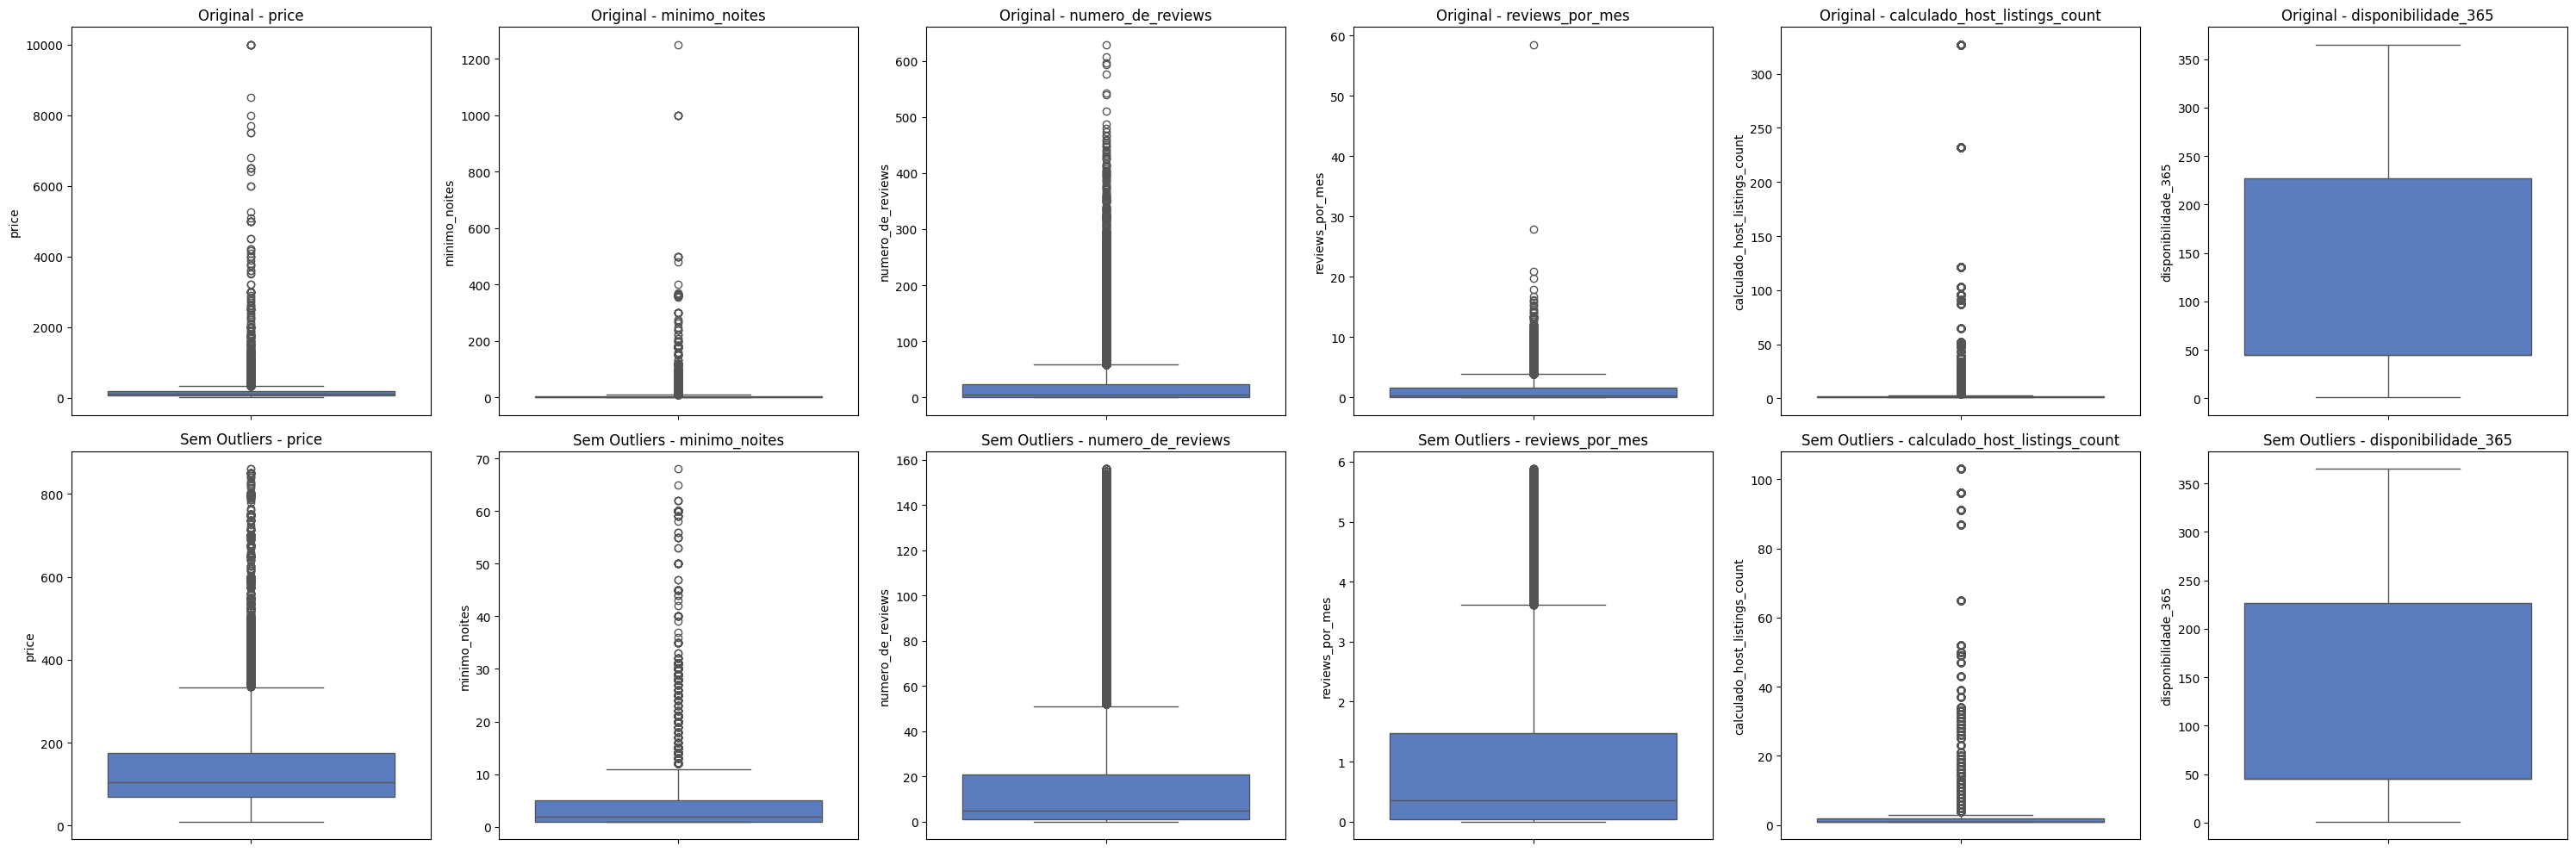

In [53]:
def drop_outliers_3std(df, field_name):
  df2 = df.copy()
  m = df2[field_name].mean()
  sd = df2[field_name].std() 
  upper = m + 3*sd
  lower = m - 3*sd
  i_up = df2[df2[field_name] > upper].index
  i_lo = df2[df2[field_name] < lower].index
  df2.drop(i_up, axis=0, inplace=True)
  df2.drop(i_lo, axis=0, inplace=True)
  return df2

# Lista de features que você deseja incluir no gráfico
features_to_plot = ['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']

# Número de colunas no subplot (ajuste conforme necessário)
num_cols = len(features_to_plot)

# Criar subplots
fig, axes = plt.subplots(ncols=num_cols, nrows=2, figsize=(5*num_cols, 10))

# Loop através das features e plotar boxplots
for i, feature in enumerate(features_to_plot):
    # Boxplot Original
    sns.boxplot(data=host_numericos, y=feature, palette="muted", ax=axes[0,i])
    axes[0,i].set_title(f"Original - {feature}")

    # Remover outliers usando drop_outliers_3std
    df_without_outliers = drop_outliers_3std(host_numericos, field_name=feature)

    # Boxplot Sem Outliers
    sns.boxplot(data=df_without_outliers, y=feature, palette="muted", ax=axes[1,i])  # use i+num_cols para colocar o segundo boxplot na linha abaixo
    axes[1, i].set_title(f"Sem Outliers - {feature}")

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()


In [27]:
#Função para dropar múltiplos outliers
def drop_outliers_3std_multi(df, columns):
    df2 = df.copy()

    for column in columns:
        m = df2[column].mean()
        sd = df2[column].std() 
        upper = m + 3*sd
        lower = m - 3*sd

        i_up = df2[df2[column] > upper].index
        i_lo = df2[df2[column] < lower].index

        df2.drop(i_up, axis=0, inplace=True)
        df2.drop(i_lo, axis=0, inplace=True)

    return df2

   


In [28]:
# Dropano os outliers das features que apresentaram mais outliers 
columns_to_drop_outliers = ['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes','calculado_host_listings_count', 'disponibilidade_365']

df_without_outliers_multi = drop_outliers_3std_multi(host_numericos, columns=columns_to_drop_outliers)



Text(7700.0, 2889.915, 'kurt = 585.76')

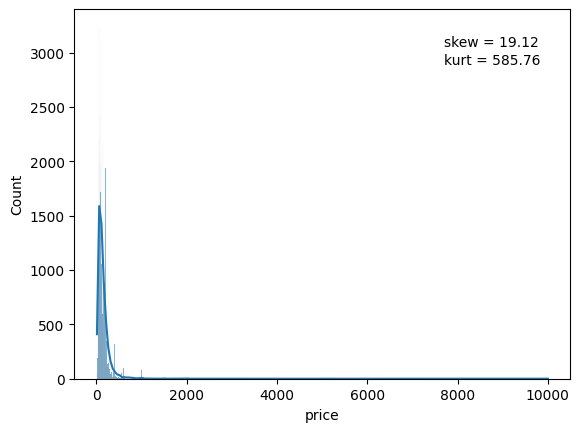

In [50]:
col = 'price'
skw = host_numericos[col].skew()
krt = host_numericos[col].kurt()
max_x = host_numericos[col].max()
g = sns.histplot(host_numericos[col],kde=True);
max_y = g.get_ylim()[1]
plt.text(0.77*max_x,0.9*max_y,f"skew = {skw:0.2f}")
plt.text(0.77*max_x,0.85*max_y,f"kurt = {krt:0.2f}")

Análise de medidas estatísticas da feature price sem remoção dos outliers. Podemos notar um valor muito alto para Skewness indicando um assimetria elevada.
A Curtose elevada indica uma cauda mais pesada com valores mais extremos ambos interferem negativamente na aplicação do algoritimo de machine learning menos robustos.

Text(662.2, 2428.4925000000003, 'kurt = 9.00')

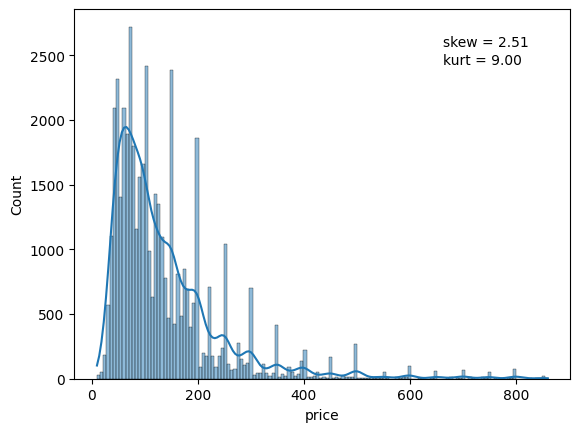

In [51]:
col = 'price'
skw = df_without_outliers_multi[col].skew()
krt = df_without_outliers_multi[col].kurt()
max_x = df_without_outliers_multi[col].max()
g = sns.histplot(df_without_outliers_multi[col],kde=True);
max_y = g.get_ylim()[1]
plt.text(0.77*max_x,0.9*max_y,f"skew = {skw:0.2f}")
plt.text(0.77*max_x,0.85*max_y,f"kurt = {krt:0.2f}")

In [52]:
logPrice = np.log(df_without_outliers_multi['price'])
logPrice.skew()
logPrice.kurt()
print('Skewness: ', logPrice.skew())
print('Kurtosis: ', logPrice.kurt())

Skewness:  0.25824437112208654
Kurtosis:  -0.14443389499036963


In [40]:
# Lista das features para aplicar a transformação logarítmica
features_to_log = ['minimo_noites', 'numero_de_reviews', 'price','disponibilidade_365','reviews_por_mes','calculado_host_listings_count']

# Criar um novo DataFrame para armazenar as features transformadas
df_log_transformed = pd.DataFrame()

# Iterar sobre as features e aplicar a transformação logarítmica
for feature in features_to_log:
    # Adicionar a feature transformada ao novo DataFrame
    df_log_transformed[f'log_{feature}'] = np.log(df_without_outliers_multi[feature])


c:\Users\ianpv\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ianpv\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


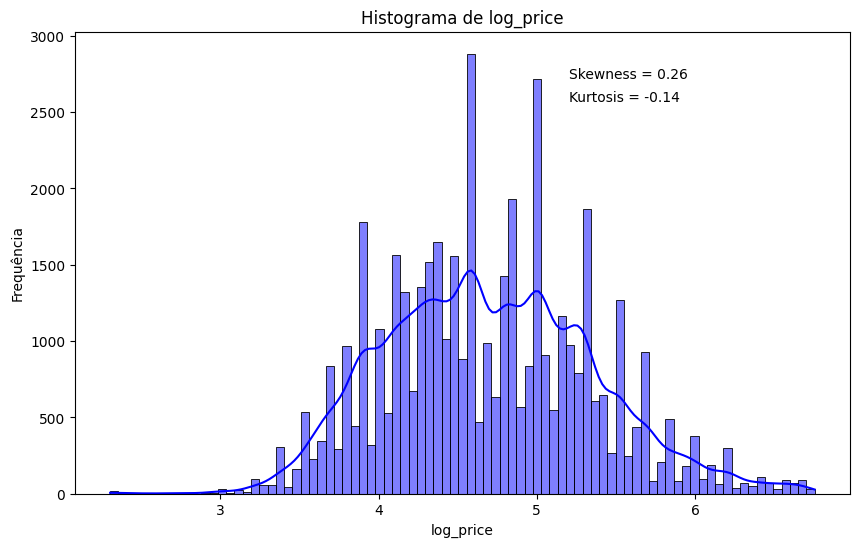

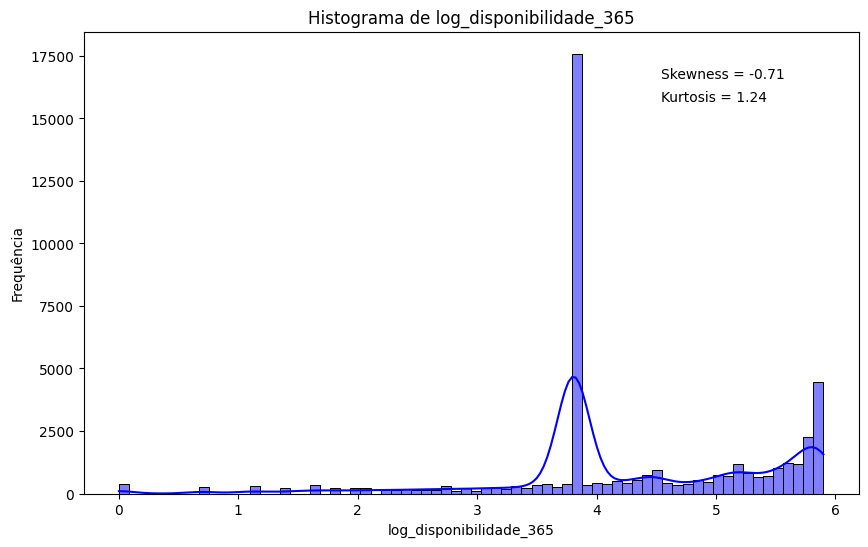

In [45]:
# Função para plotar histograma com informações de skewness e kurtosis
def plot_hist_skew_kurt(df, col):
    skw = df[col].skew()
    krt = df[col].kurt()
    max_x = df[col].max()
    
    plt.figure(figsize=(10, 6))
    g = sns.histplot(df[col], kde=True, color='blue')
    max_y = g.get_ylim()[1]
    
    plt.text(0.77 * max_x, 0.9 * max_y, f"Skewness = {skw:0.2f}")
    plt.text(0.77 * max_x, 0.85 * max_y, f"Kurtosis = {krt:0.2f}")
    
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

# Plotar histograma para 'log_price'
plot_hist_skew_kurt(df_log_transformed, 'log_price')

# Plotar histograma para 'log_disponibilidade_365'
plot_hist_skew_kurt(df_log_transformed, 'log_disponibilidade_365')

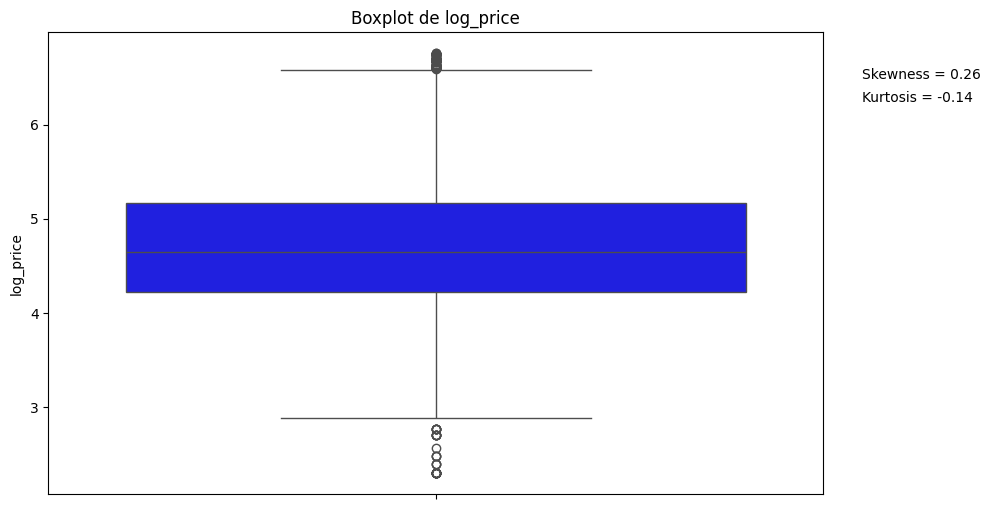

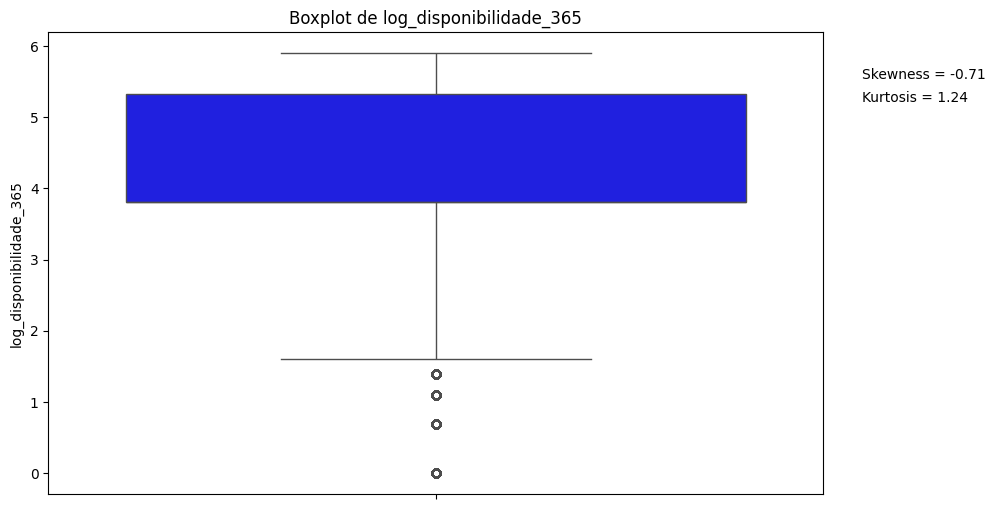

In [51]:
# Função para plotar boxplot com informações de skewness e kurtosis
def plot_box_skew_kurt(df, col):
    skw = df[col].skew()
    krt = df[col].kurt()
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=col, color='blue')
    
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    
    plt.text(1.05, 0.9, f"Skewness = {skw:0.2f}", transform=plt.gca().transAxes)
    plt.text(1.05, 0.85, f"Kurtosis = {krt:0.2f}", transform=plt.gca().transAxes)
    
    plt.show()

# Plotar boxplot para 'price'
plot_box_skew_kurt(df_log_transformed, 'log_price')

# Plotar boxplot para 'disponibilidade_365'
plot_box_skew_kurt(df_log_transformed, 'log_disponibilidade_365')

In [46]:
nf_log_cols = df_log_transformed.columns

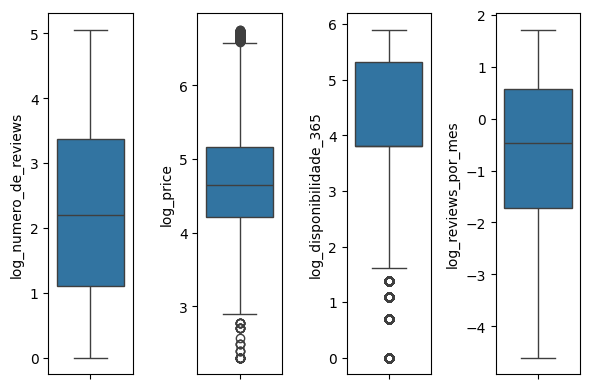

In [48]:
fig,axes=plt.subplots(nrows=1,
                      ncols=4,
                      figsize=(6,4))
axes = axes.ravel() # ou .ravel()
for i,col in enumerate(nf_log_cols[1:-1]):
    if (i<len(axes)):
        sns.boxplot(data=df_log_transformed,y=col,ax=axes[i])
plt.tight_layout()

Como visto pelo boxplot a transformação dos dados numéricos com com o cálculo do logaritimo natural foi importante para estabilizar a assimetria e curtose.

# Análise Exploratória de Dados (EDA)

### Objetivos:
- Definir os atributos mais adequados.
- Encontrar padrões
- Validar resultados.
- Refinar Features que serão utilizados para ML

**Métodos**
- Análise univariada - fornece estatísticas resumidas para cada atributo dos dados brutos
- Análise bivariada - busca relação entre cada atributo nos dados e a variável alvo
- Análise multivariada - busca por interações entre diferentes atributos nos dados
- Redução da dimensionalidade - ajuda a identificar os atributos mais relevante dos dados e permite o processamento de um volume reduzido de dados.